# Summary on available functions

(Just for help)

Mathematical functions:
* deriv(xx_tab, ff_tab)
* integral(xx_tab, ff_tab, F0=0.0)

Useful Python functions
* fill_list_series(value_0, value_max, delta_value)
* calc_func_list(value_list, func)
* find_ind(tab, value)
* find_max_ind(tab)
* find_min_ind(tab)

1D:
Displacement and distance covered:
* calc_displacement_1D(x_tab)
* calc_distance_covered_1D(x_tab)

2D:
* calc_abs_2D(xc_tab, yc_tab)
* calc_displacement_2D(x_tab, y_tab)
* calc_distance_covered_2D(x_tab, y_tab)

In [2]:
!wget https://github.com/zoldbirka/colab-eng-phys/raw/refs/heads/main/twodkinematics.py
# Make sure twodkinematics.py is downloaded and copied next to this file!
# Or copy all functions from template-kinem-2d.ipynb at the start!

--2024-11-06 13:45:10--  https://github.com/zoldbirka/colab-eng-phys/raw/refs/heads/main/twodkinematics.py
github.com (github.com) feloldása… 140.82.121.3
Csatlakozás a következőhöz: github.com (github.com)[140.82.121.3]:443… kapcsolódva.
HTTP kérés elküldve, várakozás válaszra… 302 Found
Hely: https://raw.githubusercontent.com/zoldbirka/colab-eng-phys/refs/heads/main/twodkinematics.py [következik]
--2024-11-06 13:45:12--  https://raw.githubusercontent.com/zoldbirka/colab-eng-phys/refs/heads/main/twodkinematics.py
raw.githubusercontent.com (raw.githubusercontent.com) feloldása… 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Csatlakozás a következőhöz: raw.githubusercontent.com (raw.githubusercontent.com)[185.199.109.133]:443… kapcsolódva.
HTTP kérés elküldve, várakozás válaszra… 200 OK
Hossz: 9149 (8,9K) [text/plain]
Mentés ide: „twodkinematics.py.2”

twodkinematics.py.2 100%[===================>]   8,93K  --.-KB/s    idő 0s     

2024-11-06 13:45:13 (30,1 MB/s) -- „twodkinemat

In [3]:
# importing modules
import math   # math functions
import matplotlib.pyplot as plt  # graph plot
%matplotlib inline

## Solution with pre written 'kinematics.py'
from twodkinematics import*

# 2D Examples

## Ball motion with no air resistance

Problem:

We throw a ball from a $h=20$ m height building with initial speed of $v_0=18$ m/s and inital angle (form the horizontal direction) of $\alpha=16$° .

* Where will the ball hit the ground?
* What will be the impact speed?
* How long did it take to reach the ground?
* What was the maximum height of this ball during the motion?
* What is the path length from the start to the impact?
* If there is another building at 25 m distance, where will the ball hit it?

## Zeroth step: set the coordinate system

Origin on the ground below the start point.

x points horizontally in the direction of initial velocity.

y point upwards.

## First step: calculate $x(t)$ and $y(t)$

In [64]:
# input data as variables
v0 = 18.0    #m/s
alpha = 16.0 #degree
h = 25.0     #m

g = 9.81     #m/s^2

In [65]:
# angle should be converted to radians!
print("testing function from math module: ", math.radians(180))

testing function from math module:  3.141592653589793


In [66]:
# calculating initial velocity components
vx0 = v0 * math.cos( math.radians(alpha) )
vy0 = v0 * math.sin( math.radians(alpha) )

# initial position components
x0 = 0.0
y0 = h

In [67]:
# defining position functions in both directions
def xt(t):
    return vx0 * t + x0

def yt(t):
    return -g/2 *t**2 + vy0 * t + y0

In [68]:
# Let's define the time values:
t_tab = fill_list_series(0.0, 5.0, 0.001) 
# We use fill_list_series() see in 'twodkinematics.py'

N = len(t_tab) # Number of time values

# t_max = 5.0 is a guess. Maybe, we have to increase it, if the body did not touch the ground.

In [69]:
# Let's calculate the x,y values (position components)
x_tab = calc_func_list(t_tab, xt)
y_tab = calc_func_list(t_tab, yt) 

In [70]:
# Let's calculate the vx, vy values (velocity components)
vx_tab = deriv(t_tab, x_tab)
vy_tab = deriv(t_tab, y_tab)

In [71]:
# Let's calculate ax, ay values 
ax_tab = deriv(t_tab, vx_tab)
ay_tab = deriv(t_tab, vy_tab)

#Note in this case we know ax = 0, and ay = -g !!!
# But usefull for plotting

In [72]:
# print some values to check
# Use the copy and change it intelligently

print("x:", x_tab[0:5])
print("y:", y_tab[0:5])
print("vx:", vx_tab[0:5])
print("vy:", vy_tab[0:5])

x: [0.0, 0.01730271052688974, 0.03460542105377948, 0.051908131580669224, 0.06921084210755896]
y: [25.0, 25.004956567404705, 25.00990332480941, 25.01484027221412, 25.019767409618822]
vx: [17.30271052688974, 17.30271052688974, 17.302710526889744, 17.30271052688974, 17.302710526889737]
vy: [4.961472404703571, 4.951662404705459, 4.9418524047073475, 4.932042404705683, 4.922232404705795]


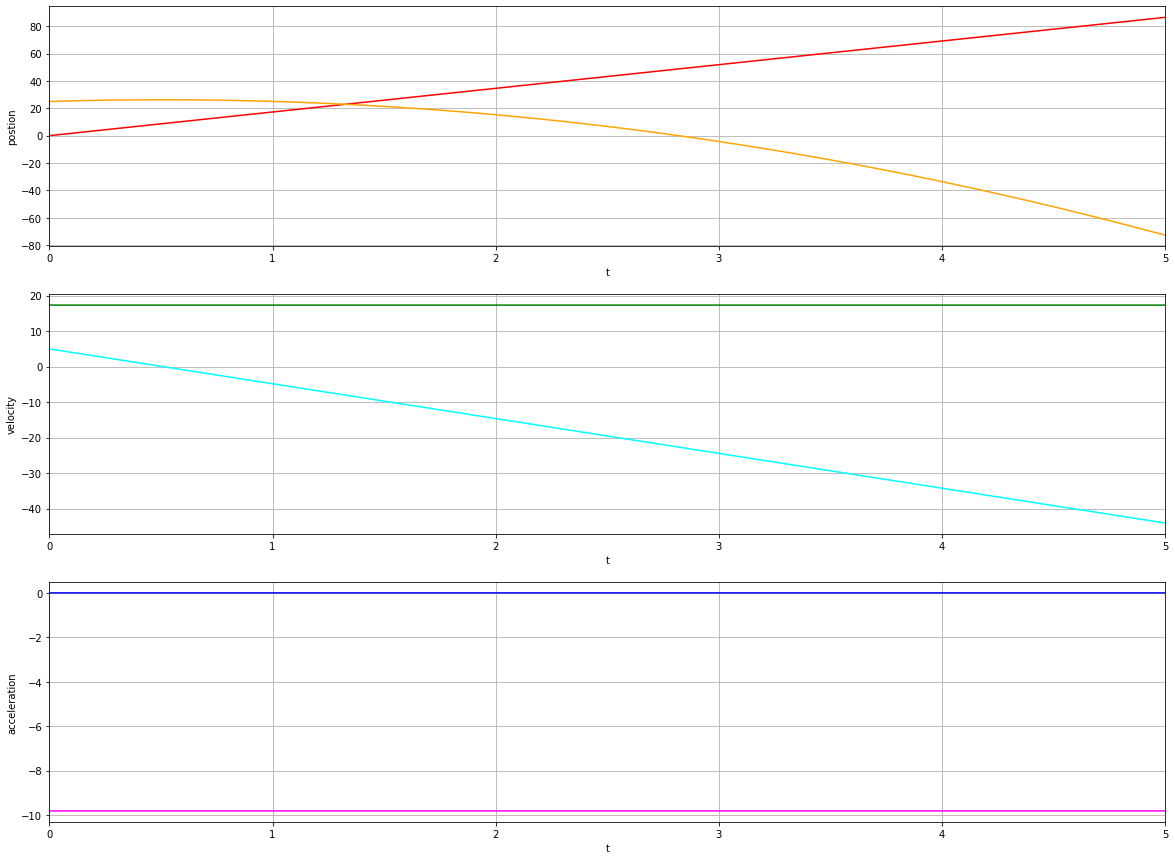

In [73]:
# It is a simple example of plotting. 
# Use the copy of it and change intelligently to plot what you want. 
# Sometimes just putting and deleting '#' character for deactivating or activating sepcific parts is enough

t_range=[0.0, 5.0]    # for a specific range. PLAY WITH END TIME!

# initialize plot routine
fig=plt.figure(figsize=(20,15))  # plot size

# position of three sub-graphs
ax1=fig.add_subplot(311) 
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(313)

# setting of horizontal axes
for ax in [ax1, ax2, ax3]:
    ax.set_xlabel("t") # set the label
    ax.set_xlim(t_range) # set the min and max values; comment it out if neccessary
    ax.grid()    # draw a grey grid 

# content of graphs
ax1.set_ylabel("postion")
ax1.plot(t_tab, x_tab, color="red") # x(t) with red
ax1.plot(t_tab, y_tab, color="orange") # y(t) with orange
ax2.set_ylabel("velocity")
ax2.plot(t_tab, vx_tab, color="green") # vx(t) with green
ax2.plot(t_tab, vy_tab, color="cyan") # vy(t) with cyan
ax3.set_ylabel("acceleration")
ax3.plot(t_tab, ax_tab, color="blue") # ax(t) with blue
ax3.plot(t_tab, ay_tab, color="magenta") # ay(t) with magenta

# plt.savefig(....)

Find the time, when the body touched the ground on the graph!

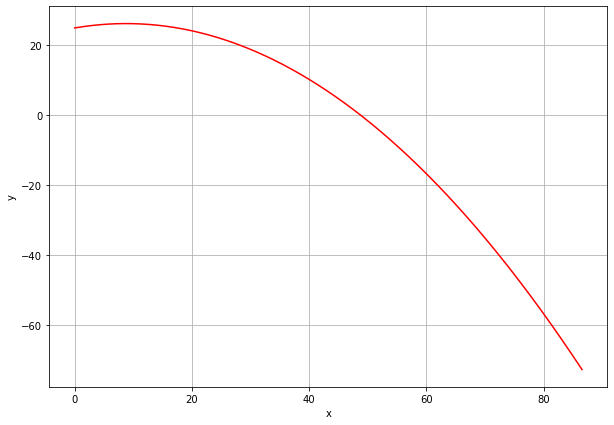

In [74]:
# Plot the path in x-y plane

fig = plt.figure(figsize=(10,7))  # plot size

# position of three sub-graphs
ax1 = fig.add_subplot(111) 

ax1.set_xlabel("x") # set the label
ax1.set_ylabel("y") # set the label
ax1.grid()    # draw a grey grid 

# content of graphs

ax1.plot(x_tab, y_tab, color="red")   # plot y over x


## Where will the ball hit the ground?
## What will be the impact speed?
## How long did it take to reach the ground?

In [75]:
# find the meaning of "hit the ground:"
# y = 0 (in this coordinate system)

# We expect and get a single solution
# So take 0th element from the reulted list

ground_ind = find_ind(y_tab, 0.0)[0]

In [76]:
# printig answers
print('x piosition at ground %.2f m'%x_tab[ground_ind] )
print('time at impact to ground %.2f s'%t_tab[ground_ind] )

# We can calculate speed "by hand" from velocity data for ground_ind element
speed_ground = (vx_tab[ground_ind]**2 + vy_tab[ground_ind]**2) **0.5
print('speed at impact to ground %.2f m/s'%speed_ground )

x piosition at ground 48.78 m
time at impact to ground 2.82 s
speed at impact to ground 28.54 m/s


In [77]:
# calculating speed ie 2D absolute value of velocities for all elements 
speed_tab = calc_abs_2D(vx_tab, vy_tab)
print('speed at impact to ground %.2f m/s'%speed_tab[ground_ind] )

speed at impact to ground 28.54 m/s


### Note on number of solutions:
Genereally more than one element in the resulting list is possible!

In [78]:
# Generally there can be more solutions!!!

impact_ind = find_ind(y_tab, 0.0)
print("Number of solutions: %d"%len(impact_ind))

Number of solutions: 1


In [79]:
# print results
for i in range(len(impact_ind)):
    print("Solution #: %d"%i)
    # impact position: x at impact (y = 0)
    print("   x postion of the impact: %5.2f m"%x_tab[impact_ind[i]])
    # impact speed: vabs at impact 
    print("   speed     of the impact: %5.2f m/s"%speed_tab[impact_ind[i]])
    # impact time: t at impact
    print("   time      of the impact: %5.2f s"%t_tab[impact_ind[i]])


Solution #: 0
   x postion of the impact: 48.78 m
   speed     of the impact: 28.54 m/s
   time      of the impact:  2.82 s


## What was the maximum height of this ball during the motion?

In [80]:
# maximum height = y has a maximum
# if only the height is question use built in method
hmax = max(y_tab)
print("Maximum height: %5.2f m"%hmax)

Maximum height: 26.25 m


### Note on solution
finding element index is necessary if other information is needed ie time, or x position

In [81]:
# maximum height = y has a maximum
# find index - if other information is needed ie time, or x position

maxheight_ind = find_max_ind(y_tab)

In [82]:
print("Maximum height: %5.2f m"%y_tab[maxheight_ind])

Maximum height: 26.25 m


In [83]:
# additional information:

print("Time    at maximum height: %5.2f s"%t_tab[maxheight_ind])
print("X-coord at maximum height: %5.2f m"%x_tab[maxheight_ind])
print("Speed   at maximum height: %5.2f m/s"%speed_tab[maxheight_ind])

Time    at maximum height:  0.51 s
X-coord at maximum height:  8.76 m
Speed   at maximum height: 17.30 m/s


## What is the path length from the start to the impact?

In [84]:
# calculate distance covered - for 2D case!!

dist_tab = calc_distance_covered_2D(x_tab, y_tab)

In [85]:
print("Path length to the impact: %5.2f m"%(dist_tab[ground_ind]))

Path length to the impact: 58.44 m


## If there is another building at 25 m distance, where will the ball hit it?

In [86]:
# other building: x = 25

# Again there is only one solution 
# take 0th element of list!
building_ind = find_ind(x_tab, 25.0)[0]

In [87]:
print("The ball will hit the other buildng at %5.2f m height."%(y_tab[building_ind]))

The ball will hit the other buildng at 21.94 m height.


In [88]:
# knowing the element index, we can look up speed table for example
print("The ball will hit the other buildng with %5.2f m/s speed."%(speed_tab[building_ind]))

The ball will hit the other buildng with 19.60 m/s speed.


# Other approach: start from acceleration

In [89]:
# input data as variables
h = 25 #m
v0 = 18 #m/s
alfa = 16   # degree

g = 9.81    # m/s^2 

In [90]:
# calculating initial velocity components
vx0 = v0 * math.cos( math.radians(alfa) )
vy0 = v0 * math.sin( math.radians(alfa) )

# initial position components
x0 = 0.0
y0 = h

In [91]:
# my ax(t) and ay(t) acceleration functions
def my_axt(t):
    return 0.0

def my_ayt(t):
    return -g

In [92]:
# Let's define the time values:
# Use t2, a2, ... to not overwirite the prevoius results

t2_tab = fill_list_series(0.0, 5.0, 0.001)  # fill_list_series : see in 'twodkinematics.py'
N = len(t2_tab) # Number of time values

# calculate accelerations
ax2_tab = calc_func_list(t_tab, my_axt)   # calc_func_list : see in "twodkinematics.py'
ay2_tab = calc_func_list(t_tab, my_ayt) 

In [93]:
# a --> v --> x calculation

# velocity with integral 
vx2_tab = integral(t2_tab, ax2_tab, vx0)  # don't forget initial velocity!
vy2_tab = integral(t2_tab, ay2_tab, vy0)

# position with integral 
x2_tab = integral(t2_tab, vx2_tab, x0)     # don't forget initial position!
y2_tab = integral(t2_tab, vy2_tab, y0)

In [94]:
# Theoretically x_tab = x2_tab, etc.
print(y_tab[-10:])
print(y2_tab[-10:])

[-72.46524367570773, -72.50925862830303, -72.55328339089832, -72.59731796349361, -72.64136234608893, -72.6854165386842, -72.7294805412795, -72.77355435387477, -72.81763797647008, -72.86173140906538]
[-72.46524367570339, -72.5092586282987, -72.55328339089397, -72.59731796348927, -72.64136234608458, -72.68541653867985, -72.72948054127515, -72.77355435387042, -72.81763797646573, -72.86173140906104]


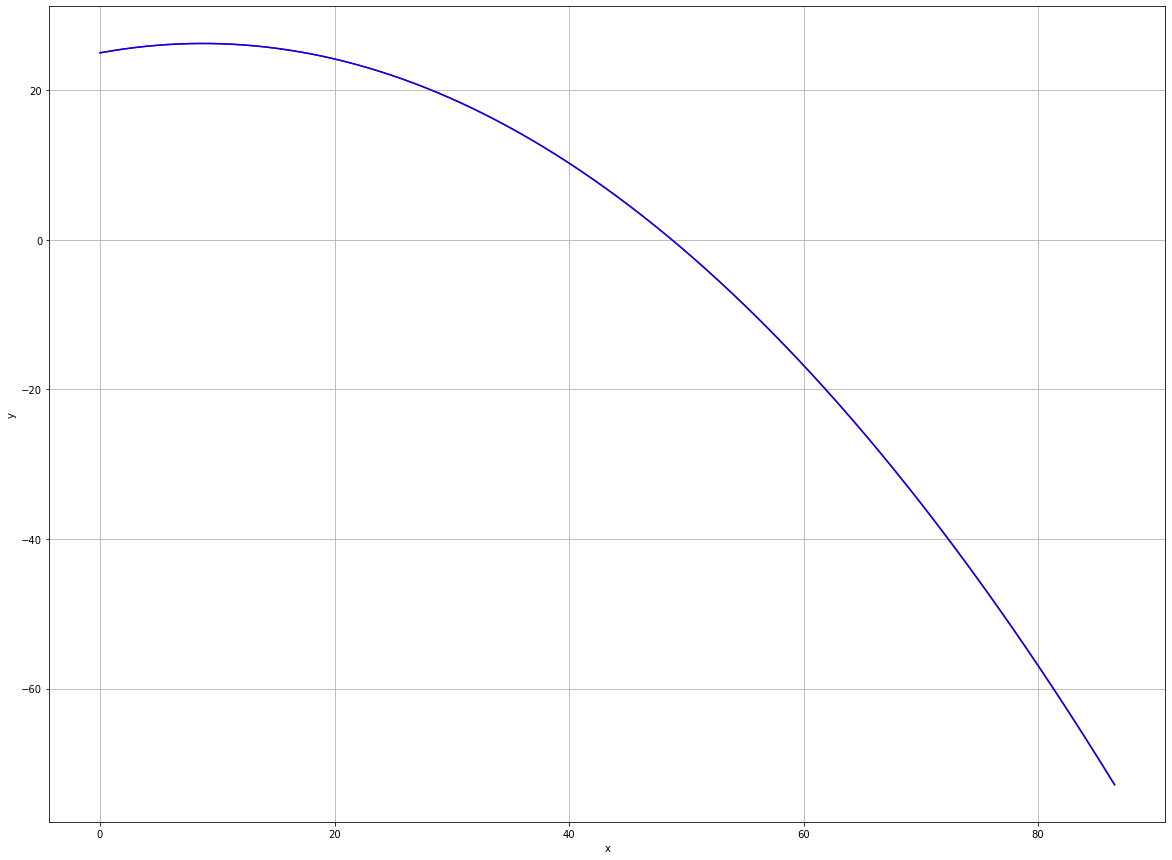

In [95]:
# Plot the two paths in x-y plane

fig=plt.figure(figsize=(20,15))  # plot size

# position of three sub-graphs
ax1=fig.add_subplot(111) 

ax1.set_xlabel("x") # set the label
ax1.set_ylabel("y") # set the label
ax1.grid()    # draw a grey grid 

# content of graphs

ax1.plot(x_tab, y_tab, color="red")   # plot y over x
ax1.plot(x2_tab, y2_tab, color="blue")   # plot y over x